In [31]:
ZERO = 0.5

def decayNumerical (numInit, decayConst, timeStep):
    amountLeft = []
    timeValues = []
    numLeft = numInit
    time = 0

    while (numLeft > ZERO):
        amountLeft.append (numLeft)
        timeValues.append (time)
        numLeft -= numLeft * decayConst * timeStep
        time += timeStep
    
    return amountLeft, timeValues

        

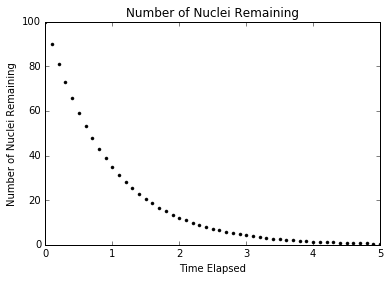

In [32]:
import pylab as plt
import numpy as np

%matplotlib inline

numNuclei = 100
decayConst = 1
timeStep = 0.1

pltTitle = "Number of Nuclei Remaining"
pltXLabel = "Time Elapsed"
pltYLabel = "Number of Nuclei Remaining"

numNumerical, timeValues = decayNumerical (numNuclei, decayConst, timeStep)

plt.plot ( timeValues, numNumerical,"k.")
plt.xlabel (pltXLabel)
plt.ylabel (pltYLabel)
plt.title (pltTitle)

plt.show ()

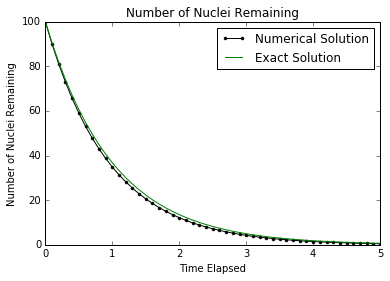

In [33]:
numExact = []

for t in timeValues:
    numExact.append (numNuclei * np.exp (-decayConst * t))

plt.plot ( timeValues, numNumerical,"k.-", label="Numerical Solution")
plt.plot ( timeValues, numExact,"g-", label="Exact Solution")
plt.xlabel (pltXLabel)
plt.ylabel (pltYLabel)
plt.title (pltTitle)

plt.legend()
plt.show ()

The numerical and exact data sets are very similar. The numerical solution has resulted in data values that are often just below the exact solution, but are still very close.

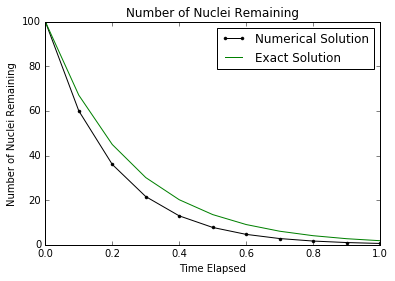

In [53]:
numNuclei2 = 100
decayConst2 = 4
timeStep2 = .1
numExact2 = []

numNumerical2, timeValues2 = decayNumerical (numNuclei2, decayConst2, timeStep2)

for t in timeValues2:
    numExact2.append (numNuclei2 * np.exp (-decayConst2 * t))

plt.plot ( timeValues2, numNumerical2,"k.-", label="Numerical Solution")
plt.plot ( timeValues2, numExact2,"g-", label="Exact Solution")
plt.xlabel (pltXLabel)
plt.ylabel (pltYLabel)
plt.title (pltTitle)

plt.legend()
plt.show ()

Playing with the decay constant, initial amount, and the time step I have noticed that increasing the time step and the decay constant decreases how similar the numerical solution is to the exact solution. Doing the opposite seemed to increase how similar the two solutions were. I did not see much of a difference between the two solutions when I changed the initial amounts.


In [84]:
def decayABNumerical (numInitialA, numInitialB, decayConstA, decayConstB, timeStep):
    amountBLeft = []
    amountALeft = []
    timeValues = []
    numALeft = numInitialA
    numBLeft = numInitialB
    time = 0
    
    while (numALeft > ZERO):
        amountBLeft.append (numBLeft)
        amountALeft.append (numALeft)
        timeValues.append (time)
        
        numALeft += timeStep * -decayConstA * numALeft
        numBLeft += timeStep * (decayConstA * numALeft - decayConstB * numBLeft)
        time += timeStep
        
    return amountALeft, amountBLeft, timeValues
    

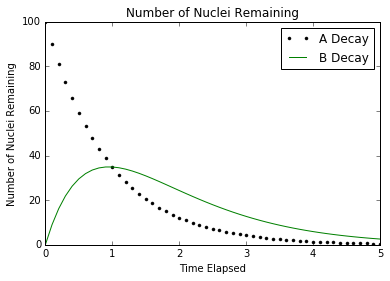

In [86]:
numInitialA = 100
numInitialB = 0
decayConstA = 1
decayConstB = 1
timeStepAB = 0.1

numA, numB, timeValuesAB = decayABNumerical (numInitialA, numInitialB, decayConstA, decayConstB, timeStepAB)

plt.plot ( timeValuesAB, numA,"k.", label="A Decay")
plt.plot ( timeValuesAB, numB,"g-", label="B Decay")
plt.xlabel (pltXLabel)
plt.ylabel (pltYLabel)
plt.title (pltTitle)

plt.legend()
plt.show ()